In [ ]:
#https://huggingface.co/google/gemma-3-4b-it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer,util

In [2]:
# Load model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [42]:
# Thai sentences for testing
sentences = [
    "ไอบูโปรเพน", 
    "ไอบูโปรเพน", 
    "ผู้ป่วยชื่ออะไร",
    "ให้คนไข้", 
    "เด็กซ์ออฟ", 
    "ตัวนะคะยานี้ชื่อ",
]

In [43]:
# Generate embeddings
embeddings = model.encode(sentences)
# Print the shape of embeddings
print("Embeddings shape:", embeddings.shape)

Embeddings shape: (6, 384)


In [44]:
embeddings

array([[-0.08242241, -0.01143669, -0.1917838 , ..., -0.06754855,
         0.2929505 ,  0.01389294],
       [-0.08242241, -0.01143669, -0.1917838 , ..., -0.06754855,
         0.2929505 ,  0.01389294],
       [-0.03856554,  0.02435224, -0.06433328, ...,  0.33249885,
         0.20284341,  0.02387432],
       [-0.14293893,  0.08785676, -0.05180061, ...,  0.17226374,
         0.20388551,  0.09926604],
       [ 0.00636343,  0.10727507,  0.01651541, ..., -0.06605734,
         0.08029008,  0.09758582],
       [-0.1358093 ,  0.0482737 , -0.08653201, ...,  0.04973571,
         0.33229676,  0.04663072]], dtype=float32)

In [45]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=embeddings.shape[0]-1)
embeddings_2d_tsne = tsne.fit_transform(embeddings)
embeddings_2d_tsne

array([[  55.784298,  -94.60821 ],
       [ -13.04219 ,  -17.331392],
       [ -23.964994,   85.80754 ],
       [-114.32523 ,    4.651573],
       [  81.53122 ,   24.428919],
       [ -65.36882 , -106.64285 ]], dtype=float32)

In [46]:
similarities_2d_tsne = util.cos_sim(embeddings_2d_tsne, embeddings_2d_tsne)
similarities_2d_tsne

tensor([[ 1.0000,  0.3829, -0.9663, -0.5425,  0.2393,  0.4690],
        [ 0.3829,  1.0000, -0.6078,  0.5683, -0.8053,  0.9955],
        [-0.9663, -0.6078,  1.0000,  0.3079,  0.0188, -0.6806],
        [-0.5425,  0.5683,  0.3079,  1.0000, -0.9455,  0.4875],
        [ 0.2393, -0.8053,  0.0188, -0.9455,  1.0000, -0.7453],
        [ 0.4690,  0.9955, -0.6806,  0.4875, -0.7453,  1.0000]])

In [47]:
pca = PCA(n_components=2, random_state=42)
embeddings_2d_pca = pca.fit_transform(embeddings)
embeddings_2d_pca_rounded = np.round(embeddings_2d_pca, 2)
embeddings_2d_pca_rounded

array([[-2.04,  1.05],
       [-2.04,  1.05],
       [ 3.36,  0.92],
       [ 1.46, -0.12],
       [-0.88, -1.73],
       [ 0.14, -1.16]], dtype=float32)

In [48]:
similarities_2d_pca = util.cos_sim(embeddings_2d_pca, embeddings_2d_pca)
similarities_2d_pca

tensor([[ 1.0000,  1.0000, -0.7381, -0.9241, -0.0050, -0.5583],
        [ 1.0000,  1.0000, -0.7381, -0.9241, -0.0050, -0.5583],
        [-0.7381, -0.7381,  1.0000,  0.9399, -0.6710, -0.1477],
        [-0.9241, -0.9241,  0.9399,  1.0000, -0.3775,  0.1989],
        [-0.0050, -0.0050, -0.6710, -0.3775,  1.0000,  0.8324],
        [-0.5583, -0.5583, -0.1477,  0.1989,  0.8324,  1.0000]])

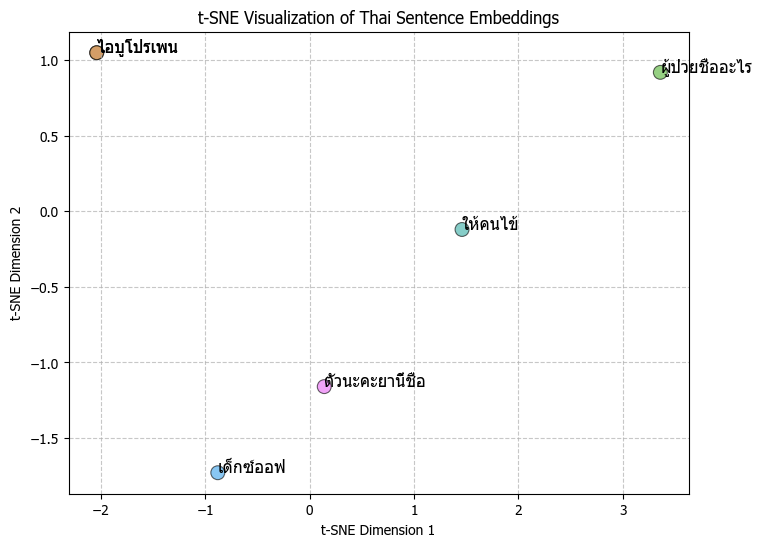

In [49]:
# Generate unique colors for each point
num_points = len(sentences)
colors = sns.color_palette("husl", num_points)

plt.rcParams['font.family'] = 'Tahoma'
plt.figure(figsize=(8, 6))

# Plot with different colors and transparency
sns.scatterplot(x=embeddings_2d_pca_rounded[:, 0], y=embeddings_2d_pca_rounded[:, 1], hue=np.arange(num_points), palette=colors, alpha=0.6, edgecolor='black',s=100)

# Annotate points with sentences
for i, text in enumerate(sentences):
    plt.annotate(text, (embeddings_2d_pca_rounded[i, 0], embeddings_2d_pca_rounded[i, 1]), fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.title("t-SNE Visualization of Thai Sentence Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend([],[], frameon=False)  # Hide legend since we use colors just for differentiation
plt.show()


In [50]:
similarities = util.cos_sim(embeddings, embeddings)

In [51]:
similarities

tensor([[1.0000, 1.0000, 0.2202, 0.3659, 0.4831, 0.4341],
        [1.0000, 1.0000, 0.2202, 0.3659, 0.4831, 0.4341],
        [0.2202, 0.2202, 1.0000, 0.7705, 0.2761, 0.5874],
        [0.3659, 0.3659, 0.7705, 1.0000, 0.4858, 0.5883],
        [0.4831, 0.4831, 0.2761, 0.4858, 1.0000, 0.6054],
        [0.4341, 0.4341, 0.5874, 0.5883, 0.6054, 1.0000]])

In [52]:
print("Cosine similarity scores:")
for i in range(num_points):
    for j in range(i + 1, num_points):
        print(f"Sentence {i} and Sentence {j}: {similarities[i][j]:.3f}")

Cosine similarity scores:
Sentence 0 and Sentence 1: 1.000
Sentence 0 and Sentence 2: 0.220
Sentence 0 and Sentence 3: 0.366
Sentence 0 and Sentence 4: 0.483
Sentence 0 and Sentence 5: 0.434
Sentence 1 and Sentence 2: 0.220
Sentence 1 and Sentence 3: 0.366
Sentence 1 and Sentence 4: 0.483
Sentence 1 and Sentence 5: 0.434
Sentence 2 and Sentence 3: 0.771
Sentence 2 and Sentence 4: 0.276
Sentence 2 and Sentence 5: 0.587
Sentence 3 and Sentence 4: 0.486
Sentence 3 and Sentence 5: 0.588
Sentence 4 and Sentence 5: 0.605
